In [14]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11

# Cavity Stability

## Confocal cavity
The Confocal cavity sits at the center of the stability diagram. A slight change to either mirror remains in the stable region (provided only one mirror changes).

Changes to the cavity length without changing the mirrors lie along the diagonal with a slope of 1. Thus, provided the mirrors are well matched, slight changes to the cavity length remain stable as well.

Text(0,0.5,'$g_2 \\equiv 1 - \\frac{L}{R_2}$')

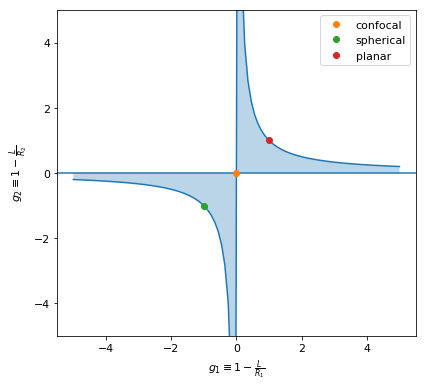

In [15]:
x = np.linspace(-5, 5, 100)

plt.gca().set_aspect(1)
plt.plot(x, 1/(x))
plt.fill_between(x, 0, 1/(x), alpha=0.3)
plt.axhline(0)
plt.ylim(-5, 5)

plt.plot(0, 0, 'o', label='confocal')
plt.plot(-1, -1, 'o', label='spherical')
plt.plot(1, 1, 'o', label='planar')
plt.legend()


plt.xlabel(r'$g_1 \equiv 1 - \frac{L}{R_1}$')
plt.ylabel(r'$g_2 \equiv 1 - \frac{L}{R_2}$')

## Concentric cavity

In [16]:
radius_curve = 1.  # m
length_cavity = 2.  # m
beam_size = 4e-3  # m 

theta = 2 * np.arctan(beam_size / 2)
wavelength = 500e-9  # m, not previously specified
n = 1

beam_waist = wavelength / (2 * np.sin(theta))

confocal_parameter = np.pi * beam_waist ** 2 / wavelength

stability = (1 - (length_cavity / radius_curve)) ** 2
print("0 <=", stability, "<= 1")
print('%0.3e' % confocal_parameter, "m confocal parameter")
print('%0.3e' % beam_waist, 'm beam waist')

0 <= 1.0 <= 1
2.454e-02 m confocal parameter
6.250e-05 m beam waist


## Laser Crystal

Here we are looking to focus into a crystal 3 mm by 2 cm.
We would like to get the focus close to this size, but entirely encompassing the crystal.
Thus, I would choose a confocal cavity, which focuses the light, concentrating the intensity on the crystal, without focusing too much like a spherical cavity.
I would place the crystal in the middle of such a cavity.

## Argon Ion Tube
Here we have a long, narrow tube, and thus want the beam to stay reasonably columnated over the whole range.
Thus, I would lean towards a planar cavity (perhaps something like concave-convex would be preferable in some cases, as well).
The tube would likely take up much of the cavity's length, it's position is fairly arbitrary with a planar cavity

# Argon Ion Laser
## Longitudinal Modes 

$\Delta\bar{\nu} = \frac{1}{2L} = \frac{1}{2} \mathsf{\left(m^{-1}\right)} = 0.005 \mathsf{\left(cm^{-1}\right)}$

FWHM = 1.97e-5 $\mathsf{cm^{-1}}$

## Number lasing

~30 longitudinal modes will be lasing in the cavity at 514.5 nm

## Comparison

From https://www.lexellaser.com/resources/:

>However, the laser line is actually made up of a large number of longitudinal modes spaced over a frequency bandwidth of approximately 5 GHz.

> ...

> Thus a 1 meter cavity length has a 150 MHz longitudinal mode spacing.

Thus, the number of modes lasing would be 5 GHz / 150 MHz $\approx$ 33.
This is in agreement with the 30 calculated in the previous part.
I was only taking into consideration those that fell within the FWHM of the laser line, a few more would be lasing albiet with lower intensity, outside of that measure.

# Mode Locked Ti:Sapph

## Intensity vs Time

0.01


Text(0,0.5,'Intensity (arb. units)')

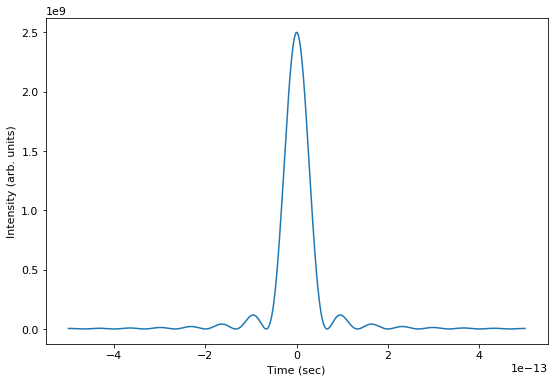

In [27]:
cavity_length = 50  # cm
mode_spacing = 1 / (2 * cavity_length)
print(mode_spacing)
modes = np.arange(12250, 12750, mode_spacing)[np.newaxis,:]
omega = 2 * np.pi * modes * 3e10

time = np.linspace(-5e-13, 5e-13, 1000)[:, np.newaxis] # sec

E_0 = 1

E_tot = np.sum(E_0 * np.exp(1j * omega * time), axis=1)
intensity = np.real(E_tot * E_tot.conj())
plt.plot(time, intensity)

plt.xlabel('Time (sec)')
plt.ylabel('Intensity (arb. units)')

## With gaussian distribution

Text(0,0.5,'Intensity (arb. units)')

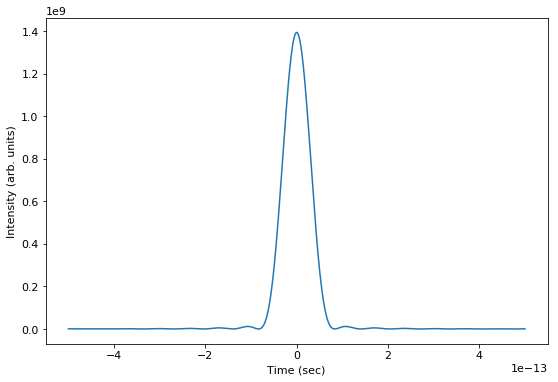

In [30]:
omega_0 = 2 * np.pi * 12500 * 3e10
sigma =  2 * np.pi * 250 * 3e10
E_0_gauss = E_0 * np.exp(-(omega - omega_0) ** 2 / sigma **2)

E_tot = np.sum(E_0_gauss * np.exp(1j * omega * time), axis=1)
intensity = np.real(E_tot * E_tot.conj())
plt.plot(time, intensity)

plt.xlabel('Time (sec)')
plt.ylabel('Intensity (arb. units)')

Text(0,0.5,'Intensity (arb. units)')

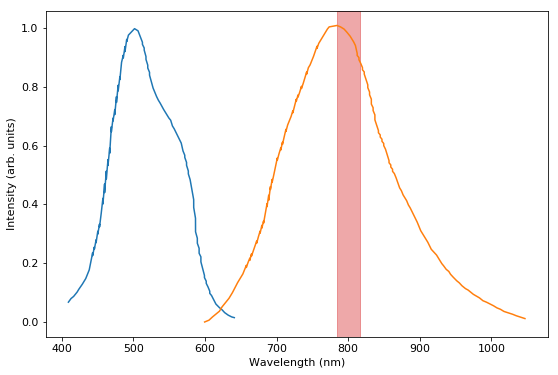

In [19]:
x,y = np.genfromtxt('tiSapphAbs.csv', delimiter=',').T
plt.plot(x,y, label='Absorption')
x,y = np.genfromtxt('tisapphEm.csv', delimiter=',').T
plt.plot(x,y, label='Emission')
plt.axvspan(1e7/modes.flat[0], 1e7/modes.flat[-1], color='C3', alpha = 0.4)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (arb. units)')

## Pulse width in time

In [31]:
max_i = np.argmax(intensity)
half_max = np.max(intensity) / 2
left = intensity[0:max_i]
right = intensity[max_i:]

i = np.argmin(np.abs(right - half_max))
right = time.flat[i + len(left)]
i = np.argmin(np.abs(left - half_max))
left = time.flat[i]

dt = right - left
print(dt)

6.906906906906906e-14


In [32]:
del_omega = sigma * 2.355
del_tau = 2 * np.pi * 0.441 / 

print(del_tau)
del_tau = 2 * np.pi * 0.441 / sigma
print(del_tau)

2.4968152866242043e-14
5.880000000000001e-14


The results are quite close if we take $\Delta\omega$ to be $\sigma$, however, if we account for the difference between $\sigma$ and FWHM, there is a factor $\sim$ 3 difference. This is not _too_ bad, but is not perfect agreement.